# Basic (probabilistic) numerical differentiation

This notebook explains the fundamentals of probabilistic numerical differentiation with `pnfindiff`. 
The "probabilistic" aspect is not covered in this notebook.

In [1]:
import jax.numpy as jnp
import pnfindiff
import matplotlib.pyplot as plt

plt.rcParams.update({"figure.dpi": 100})

## First-order derivatives

Consider a function $f: \mathbb{R} \rightarrow \mathbb{R}$.
We set up a probabilistic numerical finite difference (PN-FD) scheme and use it to compute the derivative of `f`,
$$
\frac{d}{dx}f(x)
$$
as follows.



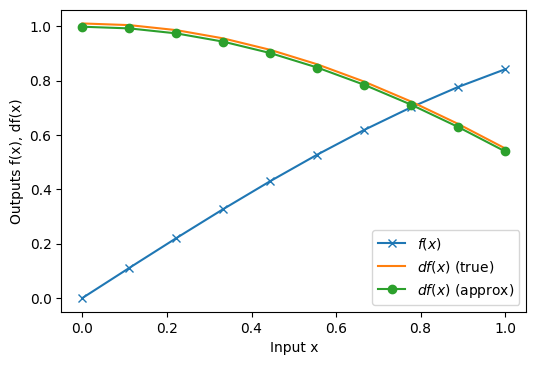

In [7]:
xs = jnp.linspace(0, 1, num=10)
fd_scheme = pnfindiff.findiff(xs=xs)


fx = jnp.sin(xs)
dfx_true = jnp.cos(xs)
dfx_approx, _ = fd_scheme(fx)

plt.plot(xs, fx, "x-", label="$f(x)$")
plt.plot(xs, dfx_true + 0.01, "-", label="$df(x)$ (true)")  # small jitter for visibility
plt.plot(xs, dfx_approx, "o-", label="$df(x)$ (approx)")
plt.legend()
plt.xlabel("Input x")
plt.ylabel("Outputs f(x), df(x)")
plt.show()

## Higher-order derivatives
The scheme can be configured freely. For example, we can choose higher order derivatives, larger stencils, and, evaluate $f$ at a larger grid.

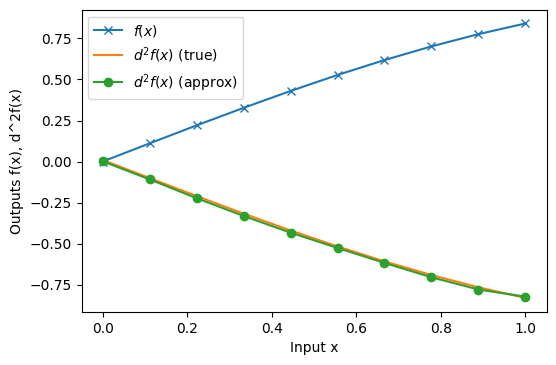

In [6]:
fd_scheme = pnfindiff.findiff(xs=xs, deriv=2, num=4)
d2fx_true = -jnp.sin(xs)
d2fx_approx, _ = fd_scheme(fx)

plt.plot(xs, fx, "x-", label="$f(x)$")
plt.plot(
    xs, d2fx_true + 0.01, "-", label=r"$d^2f(x)$ (true)"
)  # small jitter for visibility
plt.plot(xs, d2fx_approx, "o-", label=r"$d^2f(x)$ (approx)")
plt.legend()
plt.xlabel("Input x")
plt.ylabel("Outputs f(x), d^2f(x)")
plt.show()

## Partial derivatives

There are two ways of computing partial derivatives.

### Outer products

The most straightforward way of computing partial derivatives would be to apply finite difference formulas to specific axes of the input.


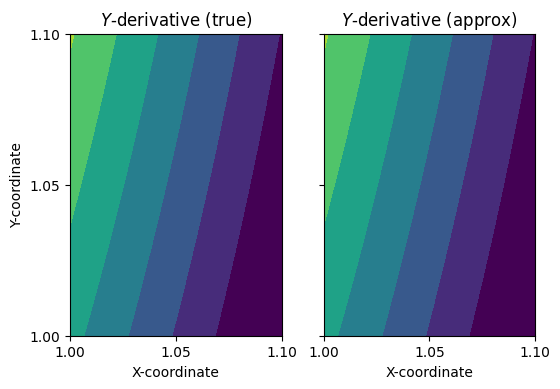

In [4]:
x = jnp.linspace(1, 1.1, 11)
y = jnp.linspace(1, 1.1, 11)

f = jnp.sin(x)[:, None] * jnp.sin(y)[None, :]  # Meshgrid-like
df_dy_true = jnp.sin(x)[:, None] * jnp.cos(y)[None, :]

fd = pnfindiff.findiff_along_axis(axis=1, xs=x, deriv=1, num=3)
df_dy_approx, _ = fd(f)

X, Y = jnp.meshgrid(x, y)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].set_title("$Y$-derivative (true)")
ax[0].contourf(X, Y, df_dy_true, vmin=0.4, vmax=0.5)

ax[1].set_title("$Y$-derivative (approx)")
ax[1].contourf(X, Y, df_dy_approx, vmin=0.4, vmax=0.5)

for a in ax:
    a.set_xticks((x[0], x[5], x[10]))
    a.set_yticks((y[0], y[5], y[10]))
    a.set_xlabel("X-coordinate")
ax[0].set_ylabel("Y-coordinate")
plt.show()

The above approach is simple yet powerful, but there are caveats.
One such caveat is that it implicitly assumes that the function $f$ is of the form 
$$
f(x, y) = f_1(x) f_y(y)
$$
which is not always the truth.
For functions that do not have such a product structure, one can do differently.

### Function-space approach

TBD
